In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import HTML

plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
# Read in the neighborhoods geojson file
neighborhoods = gpd.read_file('./dataset/neighborhoods.geojson')

# Get just the Urban Residents neighborhood polygon and save it as urban_polygon
urban_polygon = neighborhoods.loc[neighborhoods.name == "Urban Residents"]

In [3]:
# Print the head of the urban polygon
print(urban_polygon.head())

# Create a copy of the urban_polygon using EPSG:3857 and print the head
urban_poly_3857 = urban_polygon.to_crs(epsg=3857)
print(urban_poly_3857.head())

# Print the area of urban_poly_3857 in kilometers squared
area = urban_poly_3857.geometry.area / 10**6
print('The area of the Urban Residents neighborhood is ', area.values, ' km squared')

               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ...
               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-9660441.281 4323289.005, -966...
The area of the Urban Residents neighborhood is  [1.12898961]  km squared


<class 'geopandas.geoseries.GeoSeries'>


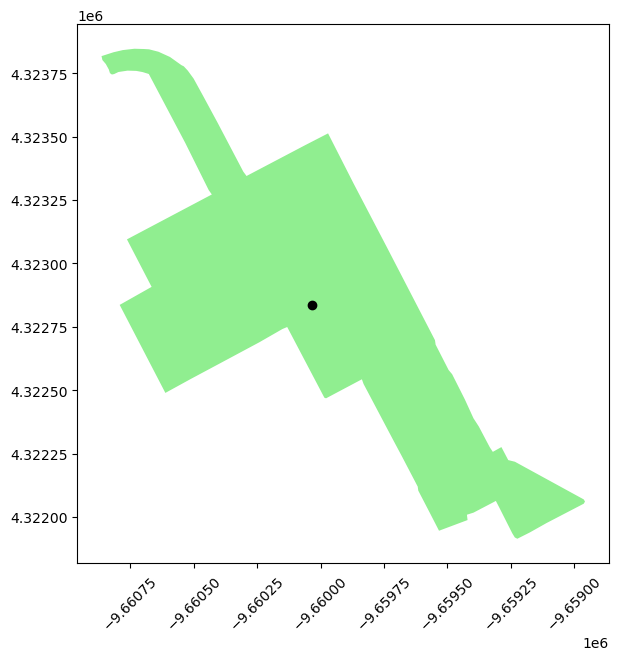

In [4]:
# Create downtown_cernter from urban_poly_3857
downtown_center = urban_poly_3857.geometry.centroid

# Print the type of downtown_center
print(type(downtown_center))

# Plot the urban_poly_3857 as ax and add the center point
ax = urban_poly_3857.plot(color='lightgreen', figsize=(7, 7));
downtown_center.plot(ax=ax, color='black');
plt.xticks(rotation=45);

In [5]:
from shapely.geometry import Point

art = gpd.read_file('./dataset/public_art.csv')
art['geometry'] = art.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)
center_point = art.geometry.centroid

In [6]:
from shapely.geometry import Point

# Create art_dist_meters using art and the geometry from art
art_dist_meters = gpd.GeoDataFrame(art, geometry=art.geometry)
art_dist_meters.crs='epsg:4326'
print(art_dist_meters.head(2))

# Set the crs of art_dist_meters to use EPSG:3857
art_dist_meters.geometry = art_dist_meters.geometry.to_crs(epsg=3857)
print(art_dist_meters.head(2))

# Add a column to art_meters, center
art_dist_meters['center'] = center_point

                             Title Last Name First Name  \
0          [Cross Country Runners]     Frost      Miley   
1  [Fourth and Commerce Sculpture]    Walker        Lin   

                            Location  Medium       Type Description  Latitude  \
0     4001 Harding Rd., Nashville TN  Bronze  Sculpture              36.12856   
1  333 Commerce Street, Nashville TN          Sculpture              36.16234   

   Longitude        Mapped Location                    geometry  
0   -86.8366   (36.12856, -86.8366)  POINT (-86.83660 36.12856)  
1  -86.77774  (36.16234, -86.77774)  POINT (-86.77774 36.16234)  
                             Title Last Name First Name  \
0          [Cross Country Runners]     Frost      Miley   
1  [Fourth and Commerce Sculpture]    Walker        Lin   

                            Location  Medium       Type Description  Latitude  \
0     4001 Harding Rd., Nashville TN  Bronze  Sculpture              36.12856   
1  333 Commerce Street, Nashville TN    

In [7]:
import pprint

# Build a dictionary of titles and distances for Urban Residents art
art_distances = {}
for row in art_dist_meters.iterrows():
    vals = row[1]
    key = vals['Title']
    ctr = vals['center']
    art_distances[key] = vals['geometry'].distance(other=ctr)
    
# Pretty print the art_distances
pprint.pprint(art_distances)

{'12th & Porter Mural': 10583948.500651473,
 'A Splash of Color': 10585357.16017826,
 'A Story of Nashville': 10583565.969078569,
 'Aerial Innovations Mural': 10579929.255218184,
 'Airport Sun Project': 10570311.412935875,
 'Andrew Jackson': 10583951.468665037,
 'Angel': 10588435.041707948,
 'Anticipation': 10583698.952539692,
 'April Baby': 10586916.00892881,
 'Arial Triangle [from the Gravity Series]': 10583398.524837973,
 'Ariel': 10585905.336208295,
 'Athena Parthenos': 10586065.827814262,
 'Benedictio': 10577769.979416678,
 'Bicycle Bus-Green Fleet': 10582635.68286198,
 'Blowing Bubbles': 10588435.041707948,
 'Breaking Bread': 10582634.392548595,
 'Building a Positive Community': 10582136.29114304,
 'Can-Do': 10582120.049094511,
 'Chet Atkins': 10583602.67968694,
 "Children's Chairs For The Seasons": 10583565.969078569,
 'Confederate Memorial': 10577769.979416678,
 'Confederate Private Monument': 10585868.029575413,
 'Confluence': 10585513.082652403,
 'Cool Fences': 10579074.34680

In [8]:
urban_polygon.crs = 'epsg:4326'

In [9]:
urban_polygon.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
# Print the head of the urban_polygon
print(urban_polygon.head())

# Create urban_center from the urban_polygon center
urban_center = urban_polygon.to_crs(epsg=4326).centroid

# Print urban_center
print(urban_center)

# Create array for folium called urban_location
urban_location = [urban_center.y, urban_center.x]

# Print urban_location
print(urban_location)

               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ...
41    POINT (-86.77756 36.16128)
dtype: geometry
[41    36.161278
dtype: float64, 41   -86.777565
dtype: float64]


C:\Users\indah\AppData\Local\Temp\ipykernel_13984\1459943588.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  urban_center = urban_polygon.to_crs(epsg=4326).centroid


In [11]:
import folium

# Construct a folium map with urban_location
downtown_map = folium.Map(location=urban_location, zoom_start=15, width=500, height=500)

# Display the map
downtown_map.save('./html/downtown_map.html')

downtown_map

In [12]:
HTML('./html/downtown_map.html')

In [13]:
urban_polygon['center'] = urban_polygon.loc[:, 'geometry'].centroid

C:\Users\indah\AppData\Local\Temp\ipykernel_13984\4128752981.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  urban_polygon['center'] = urban_polygon.loc[:, 'geometry'].centroid
C:\Users\indah\anaconda3\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [14]:
# Create array for called folium_loc from the urban_polygon center point
point = urban_polygon.center
folium_loc = [point.values.y, point.values.x]

# Construct a map from folium_loc: downtown_map
downtown_map = folium.Map(location = folium_loc, zoom_start = 15, width=500, height=500)

# Draw our neighborhood: Urban Residents
folium.GeoJson(urban_polygon.geometry).add_to(downtown_map)

downtown_map.save('html/downtown_map2.html')

downtown_map

In [15]:
HTML('./html/downtown_map2.html')

In [16]:
# Create a GeoDataFrame from art and verify the type
art_geo = gpd.GeoDataFrame(art, crs=neighborhoods.crs, geometry=art.geometry)

# Spartially join neighborhoods with art_geo
neighborhood_art = gpd.sjoin(art_geo, neighborhoods, op='within')

# Create urban_art from neighborhood_art where the neighborhood name is Urban Residents
urban_art = neighborhood_art.loc[neighborhood_art.name == 'Urban Residents']

C:\Users\indah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [17]:
# Iterate through the urban_art and print each part of tuple returned
for row in urban_art.iterrows():
    print('first part: ', row[0])
    print('second part: ', row[1])
    
# Create a location and marker with each iteration for the downtown_map
for row in urban_art.iterrows():
    row_values = row[1]
    location = [row_values['Latitude'], row_values['Longitude']]
    marker = folium.Marker(location=location)
    marker.add_to(downtown_map)

downtown_map.save('html/downtown_map3.html')    

downtown_map

first part:  1
second part:  Title                [Fourth and Commerce Sculpture]
Last Name                                     Walker
First Name                                       Lin
Location           333 Commerce Street, Nashville TN
Medium                                              
Type                                       Sculpture
Description                                         
Latitude                                    36.16234
Longitude                                  -86.77774
Mapped Location                (36.16234, -86.77774)
geometry                  POINT (-86.77774 36.16234)
center                    POINT (-86.77774 36.16234)
index_right                                       41
name                                 Urban Residents
Name: 1, dtype: object
first part:  4
second part:  Title                                           A Story of Nashville
Last Name                                                     Ridley
First Name                             

In [18]:
HTML('./html/downtown_map3.html')

In [19]:
# Print the urban_art titles
print(urban_art.Title)

# Print the urban_art description
print(urban_art.Description)

# Replace Nan and ' values in description
urban_art.Description.fillna('', inplace=True)
urban_art.Description.str.replace("'", "`")

# Print the urban_art descriptions again
print(urban_art.Description)

1                        [Fourth and Commerce Sculpture]
4                                   A Story of Nashville
21                                           Chet Atkins
22                     Children's Chairs For The Seasons
34                                       Foliated Scroll
39                                          Gone Fishing
40                             Happy Times at The Arcade
54                                     Johnny Cash Mural
55                                 La Storia della Terra
57                                 Les Paul Guitar Mural
59                                         Library Doors
60                               Lightning Wire Fountain
66     Nashville, A History through Maps and Aerial V...
67                                               Oh, Roy
68                                  Orpheus and Eurydice
75                               Piecing It All Together
104                                  The Birth of Apollo
105                            

C:\Users\indah\AppData\Local\Temp\ipykernel_13984\1203084515.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_art.Description.fillna('', inplace=True)


In [20]:
downtown_map = folium.Map(location=urban_location, zoom_start=15, width=500, height=500)
folium.GeoJson(urban_polygon.geometry).add_to(downtown_map)

# Create popups inside the loop you built to create the markers
for row in urban_art.iterrows():
    row_values = row[1] 
    location = [row_values['Latitude'], row_values['Longitude']]
    popup = (str(row_values['Title']))
    
    marker = folium.Marker(location = location, popup=popup)
    marker.add_to(downtown_map)

downtown_map.save('./html/downtown_map4.html')
# Display the map.
downtown_map

In [21]:
HTML('./html/downtown_map4.html')